# Soccer Mobile
<!-- Introduction of the project -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
import random
plt.rcParams['figure.figsize'] = [20, 10]

## Geometry

In [3]:
from geo import *

In [4]:
#from motion_control import *

## Vision


In [5]:
# ...
gmap = None
pBall = Pos() #
pGoal = Pos() #

TypeError: __init__() missing 2 required positional arguments: 'x' and 'y'

## Global Navigation
This module aims to plan a path from the start to the goal.
The result will be represented in form of a list of Waypoints.

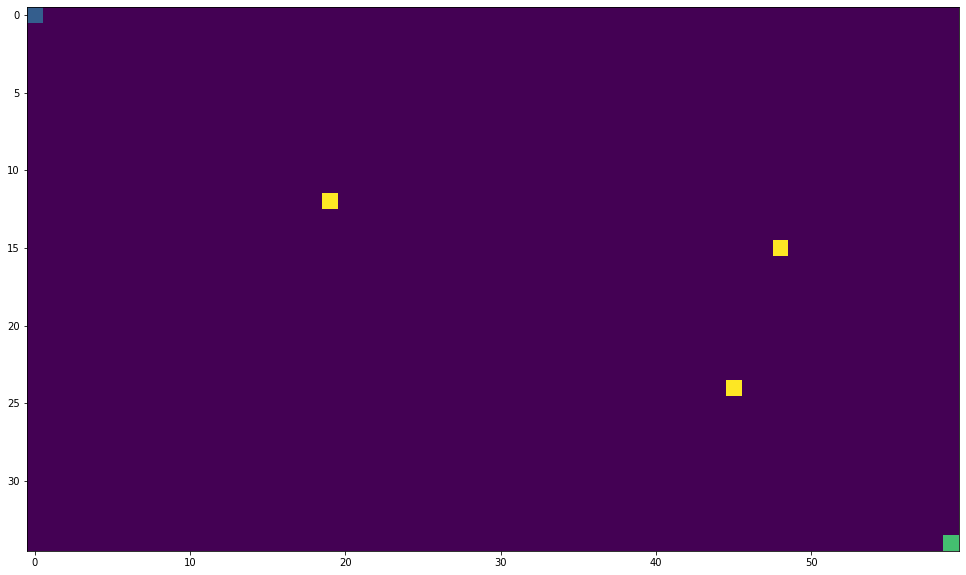

In [6]:
###
h, w = 35, 60
pStart = Pos(0,0)
pBall = Pos(h-1, w-1)
rmap = GridMap(h, w, 0.01)
rmap.set_start(pStart)
obslist = [Pos(random.randint(11,h-11),random.randint(11,w-11)) for _ in range(3)]
rmap.set_obs(obslist)

Goal_state = State(Pos(h-1,w-1), 1.57)
###

obsmap = [[int(val) for val in li] for li in rmap.obs_map]
obsmap[pStart.x][pStart.y] = 0.3
obsmap[pBall.x][pBall.y] = 0.7
plt.imshow(obsmap)

### Pre-Processing
#### Enlarge the obstacles
After getting the environment map, we need to enlarge the obstacles to make sure every point is safe for thymio.

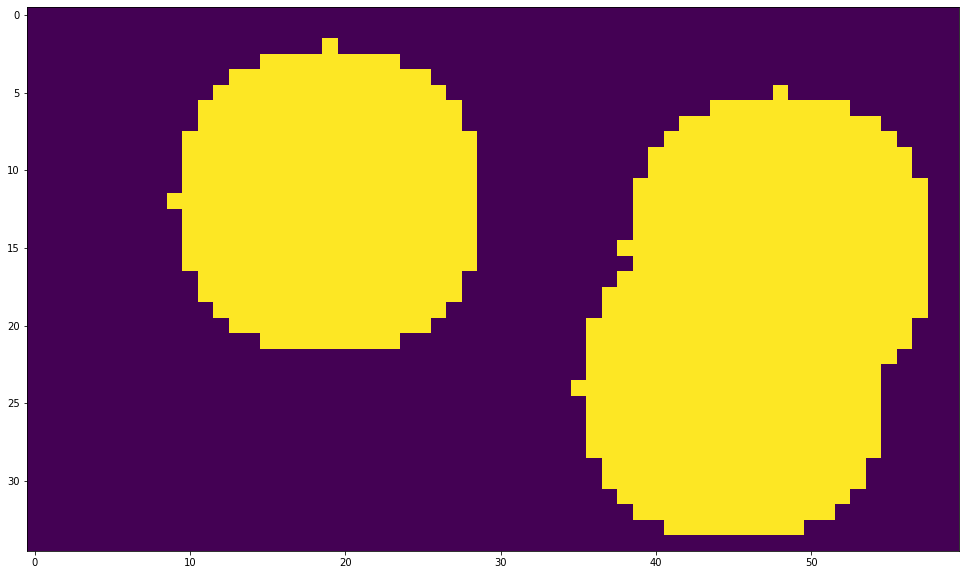

In [7]:
from global_navigation import *
planner =  PathPlanner(rmap, path_simplification=False)
plt.imshow(planner.obs) # has auto enlarged the obs when load the map

#### Caculate the actual position
The goal position represent where that the head of thmio will reach; We need to calculate the actual center position of thymio for the goal.

Goal State: (33, 59, 0.0)


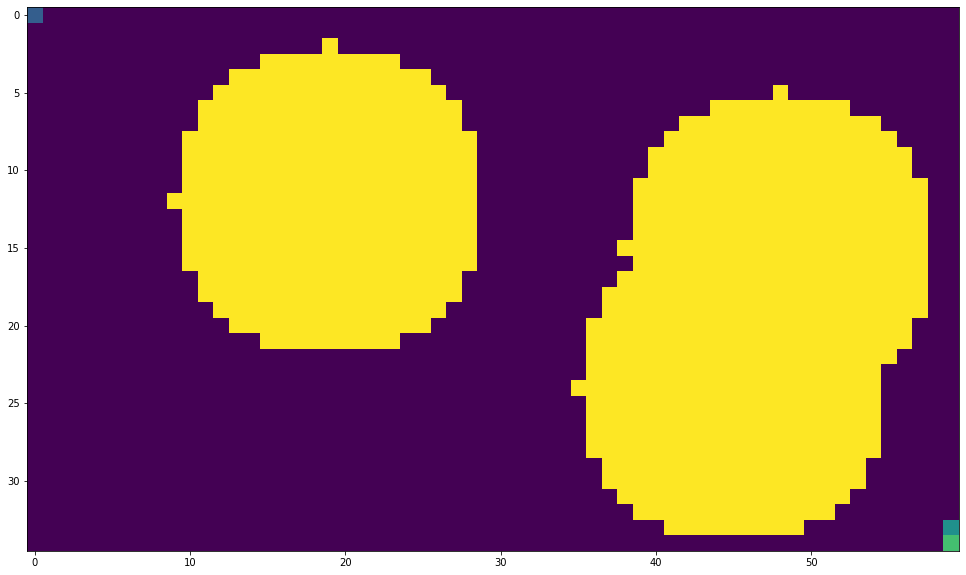

In [8]:
pGoal1 = planner.approach(pBall)
planner.set_goal(pGoal1)
print("Goal State:",pGoal1)
import copy
obs = copy.deepcopy(planner.obs)
obs[pStart.x][pStart.y] = 0.3
obs[pBall.x][pBall.y] = 0.7
obs[pGoal1.pos.x][pGoal1.pos.y] = 0.5
plt.imshow(obs)

### Path Planning
We implemented two ways of path planning, namely, A* and RRT.
A* is an optimal path planning algorithm.
RRT is usually applied for high-dimension path planning. For our project, if we get a quite large grid map, the computational cost will be high, and RRT can boost up the speed. We should note that, it's not a optimal algorithms.

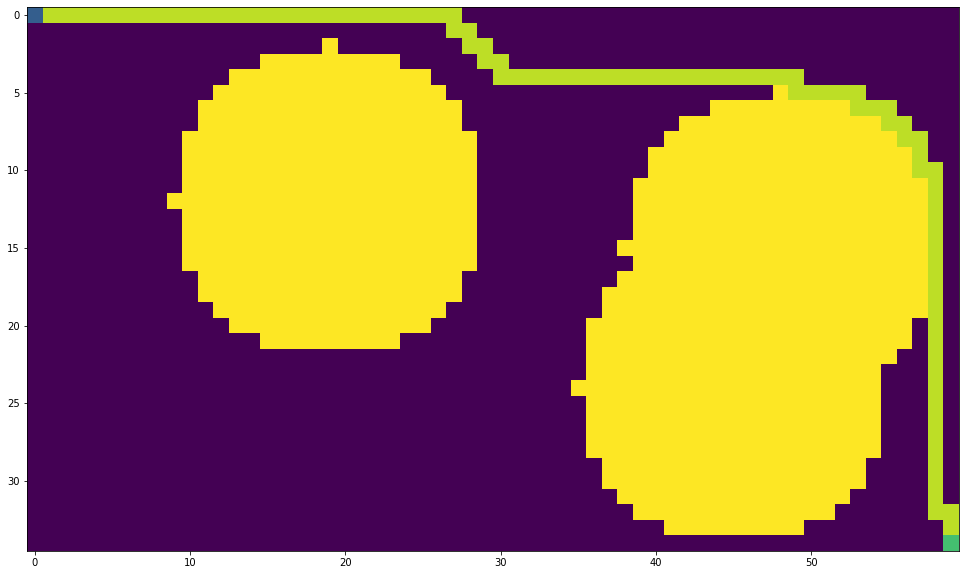

In [9]:
# the result of A*
# points in the same direction have been deleted
planner.method = "A*"
apath = planner.plan()
nobs = copy.deepcopy(obs)
for p in apath:
    nobs[p.x][p.y] = 0.9
plt.imshow(nobs)

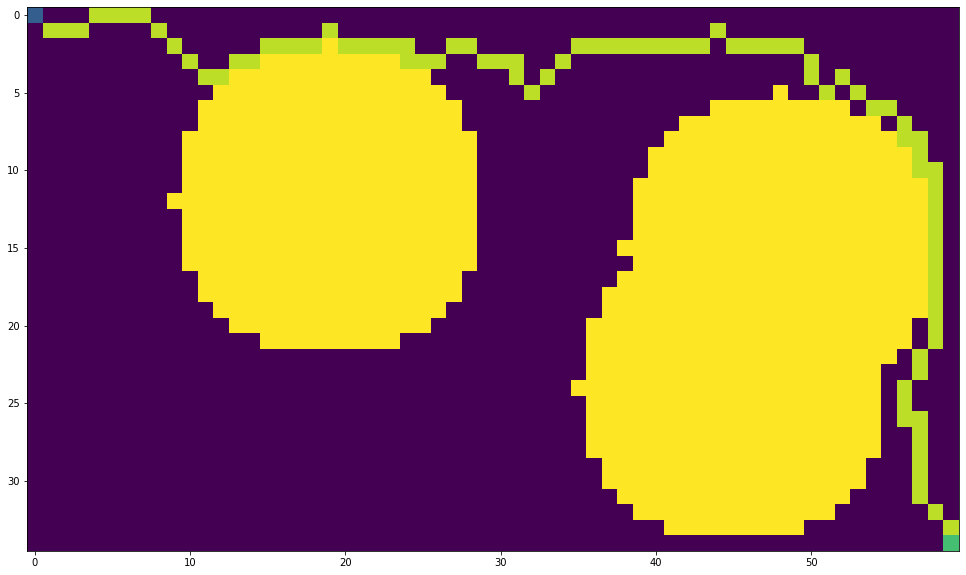

In [10]:
# the result of RRT
planner.method = "RRT"
rrtpath = planner.plan()
nobs = copy.deepcopy(obs)
for p in rrtpath:
    nobs[p.x][p.y] = 0.9
plt.imshow(nobs)

### Post-Processing
#### Collect waypoints in same direction
The waypoints in same direction just have the same effect for path tracking, so we try to elimate some redandent points.

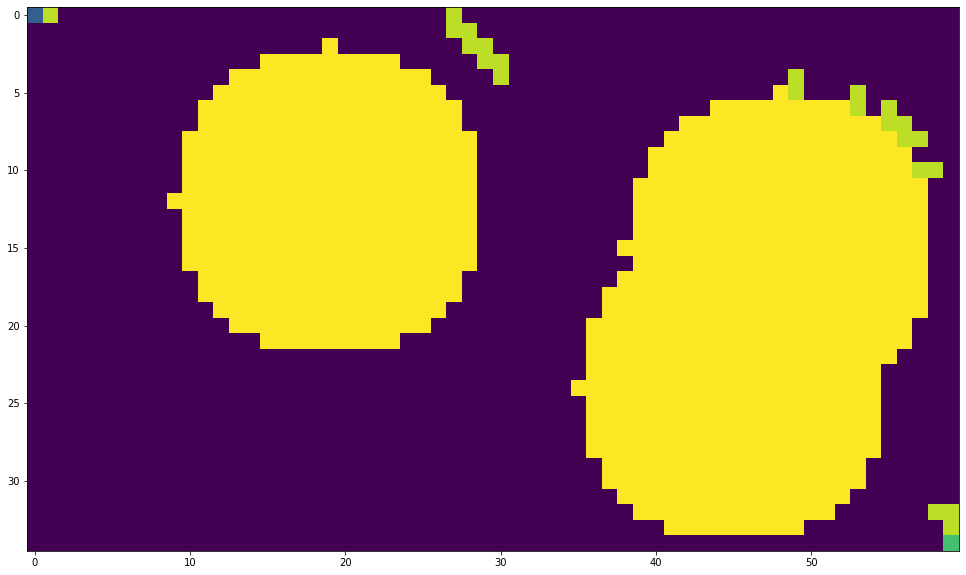

In [11]:
apath = planner.collect_wps(apath)
nobs = copy.deepcopy(obs)
for p in apath:
    nobs[p.x][p.y] = 0.9
plt.imshow(nobs)

#### Shrink the waypoints
Try to connect the grandparent to grandchild directly.

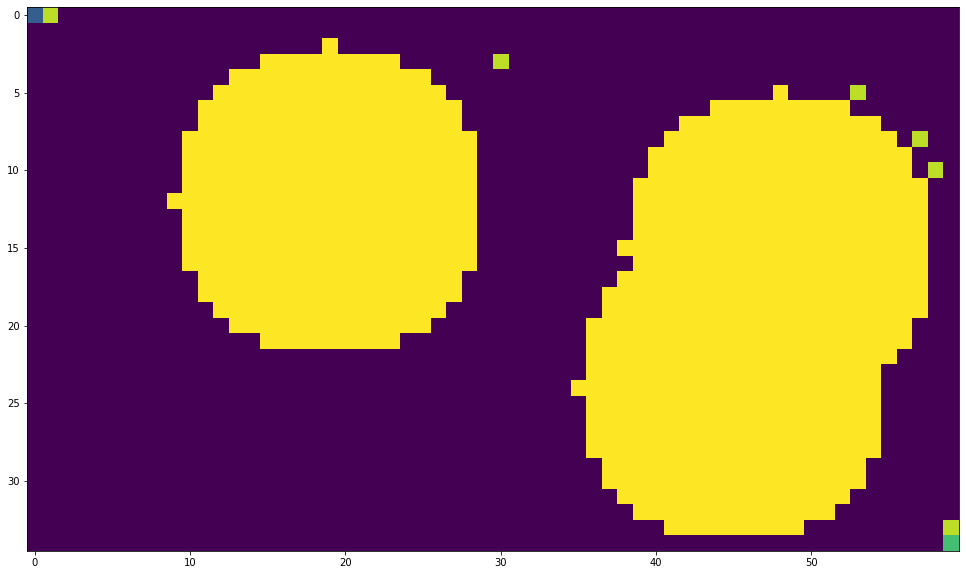

In [12]:
apath = planner.path_simplification(apath)
nobs = copy.deepcopy(obs)
for p in apath:
    nobs[p.x][p.y] = 0.9
plt.imshow(nobs)

## Local Navigation


## Filtering
tell where Thymio is.

In [13]:
# Motor Calibration

## Motion Control
Actuator.

In [14]:
controller = MotionController()
control_cycle = 10 # ms = 100Hz

NameError: name 'MotionController' is not defined

In [ ]:
get_ball = False
# 1. get the ball
planner.set_goal = pBall
planner.set_start = None # Pos of Thymio [Filtering]
waypoints = planner.plan()
while not get_ball:
    if controller.obs_forward():
        pass #   [Local Navigation]
        #          return to waypoints to follow
    else:
        waypoints = controller.go_pos(waypoints) # follow the waypoints 
    pass

# 2. Push the ball to the goal
finished = False
planner.set_goal = pGoal
planner.set_start = None # Pos of Thymio [Filtering]
waypoints = planner.plan()
while not finished:
    if controller.obs_forward():
        pass #   [Local Navigation]
        #          return to waypoints to follow
    else:
        waypoints = controller.go_pos(waypoints) # follow the waypoints 
    pass

# Serial Control vs TDMClient

In [ ]:
from Thymio import Thymio
import os
import sys

In [ ]:
!pip install pyserial

In [ ]:
import sys
import glob
import serial


def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result


if __name__ == '__main__':
    print(serial_ports())

[]


In [ ]:
sys.setrecursionlimit(3000)
print(os.getenv('COM4'))

None


In [ ]:
th = Thymio.serial(port=os.getenv('COM6'), refreshing_rate=0.1)

IndexError: list index out of range